# Front matter: standard imports and functions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from pylab import figure, axes, pie, title, show
#from scipy.optimize import curve_fit
from pylab import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.numpoints'] = True
matplotlib.rcParams.update({'font.size': 22})

In [4]:
def prevalence(my_list,thr,dr):

    total = len(my_list)
    
    if dr==0:
        fltd = len(list(filter(lambda x: x <= thr, my_list)))
    else:
        fltd = len(list(filter(lambda x: x > thr, my_list)))
    
    prev = float(fltd) / float(total)
    
    return prev

In [5]:
def classify(x):
    
    r1=x['original']
    r2=x['smeared']
        
    myc='XXX'
    if r1<-2:
        if r2<-2:
            myc='tru_pos'
        if r2>=-2:
            myc='fal_neg'
    if r1>=-2:
        if r2<-2:
            myc='fal_pos'
        if r2>=-2:
            myc='tru_neg'
    x['class']=myc
    return x

In [6]:
def print_survey_labels(rng,cnt,myx,myy):
    plt.text(myx[0]+0.06, myy[0]+0.01, cnt[0], fontsize=16)
    plt.text(myx[1]-0.7, myy[1]+0.01, cnt[1], fontsize=16)
    plt.text(myx[2]+0.06, myy[2]+0.01, cnt[2], fontsize=16)
    plt.text(myx[3]+0.06, myy[3]+0.01, cnt[3], fontsize=16)
    plt.text(myx[4]+0.06, myy[4]+0.01, cnt[4], fontsize=16)
    plt.text(myx[5]+0.06, myy[5]+0.01, cnt[5], fontsize=16)
    plt.text(myx[6]-1.2, myy[6]+0.01, cnt[6], fontsize=16)
    plt.text(myx[7]+0.06, myy[7]+0.01, cnt[7], fontsize=16)
    plt.text(myx[8]-1.0, myy[8]+0.01, cnt[8], fontsize=16)
    plt.text(myx[9]+0.06, myy[9]-0.03, cnt[9], fontsize=16)
    plt.text(myx[10]+0.06, myy[10]+0.01, cnt[10], fontsize=16)
    plt.text(myx[11]+0.06, myy[11]+0.01, cnt[11], fontsize=16)
    plt.text(myx[12]+0.06, myy[12]+0.01, cnt[12], fontsize=16)
    plt.text(myx[13]+0.06, myy[13]+0.01, cnt[13], fontsize=16)
    plt.text(myx[14]+0.06, myy[14]+0.01, cnt[14], fontsize=16)
    plt.text(myx[15]+0.06, myy[15]+0.01, cnt[15], fontsize=16)
    plt.text(myx[16]+0.06, myy[16]-0.03, cnt[16], fontsize=16)
    plt.text(myx[17]+0.06, myy[17]+0.006, cnt[17], fontsize=16)
    plt.text(myx[18]+0.06, myy[18]+0.01, cnt[18], fontsize=16)
    plt.text(myx[19]+0.06, myy[19]+0.01, cnt[19], fontsize=16)
    plt.text(myx[20]+0.06, myy[20]+0.01, cnt[20], fontsize=16)

In [7]:
def get_pars(age,haz):
    histpars =np.histogram(age,bins=60,range=[0,60])

    mysum = np.sum(histpars[0])

    #24+-1, 36+-1, and 48+-1 month bins
    bmp_bins = histpars[0][23]+histpars[0][24]+histpars[0][25]+histpars[0][35]+histpars[0][36]+histpars[0][37]+histpars[0][47]+histpars[0][48]+histpars[0][49]

    bmp_frac = bmp_bins / float(mysum)
            
    return bmp_frac,haz.std(),haz.mean()

In [8]:
def show_bmps(age):
    histpars =np.histogram(age,bins=60,range=[0,60])
    
    myx = histpars[1][:-1]

    newx = array([23,24,25,35,36,37,47,48,49])
    newy = histpars[0][np.r_[23:26,35:38,47:50]]
    plt.bar(myx,histpars[0])
    plt.bar(newx,newy)
    
    return 0

In [9]:
def overlay(age):
    histpars =np.histogram(age,bins=60,range=[0,60])
    mysum = np.sum(histpars[0])

    renorm = histpars[0] / float(mysum) * 1000.
    myx = histpars[1][:-1]

    plt.plot(myx,renorm,c='grey')

# OVERALL ANALYSIS LOGIC FLOW (all items below will be numerically explored with the exception of the first):
## <font color='black'> (1) Any distribution's standard deviation increases from its true value in the presence of non-directional measurement errors [this is a generic truth and will not be demonstrated].</font>
## <font color='black'> (2) For threshold-based indicators such as stunting, the measured prevalence rates may be significantly biased in the presence of elevated non-directional measurement errors.</font>
## <font color='black'> (3) Among 21 population-based surveys collected in support of Food For Peace Development Food Security Activities evaluations, there exists a striking correlation between a feature in the age distribution and the height-for-age distribution's standard deviation value.  This feature is associated with measurement error.  Given that the close connection between a child's age and their height-for-age value, this observation suggests a causitive relationship.  No eligible surveys were excluded from this analysis.</font>
## <font color='black'> (4) Interpreted together, the previous items indicate the stunting rates reported from these surveys likely are significantly different from the true prevalence rates present in the communities studied.  Fortunately, these biases can be quantified and an improved stunting rate estimate can be obtained.  This relationship could provide an additional tool to future survey efforts seeking to quantify how measurement error may have influenced their top-line results.</font>

### <font color='black'> Using simulation tools, let's begin by visually demonstrating the principle behind item (2): the connection between standard deviation and threshold-based prevalence.</font> 

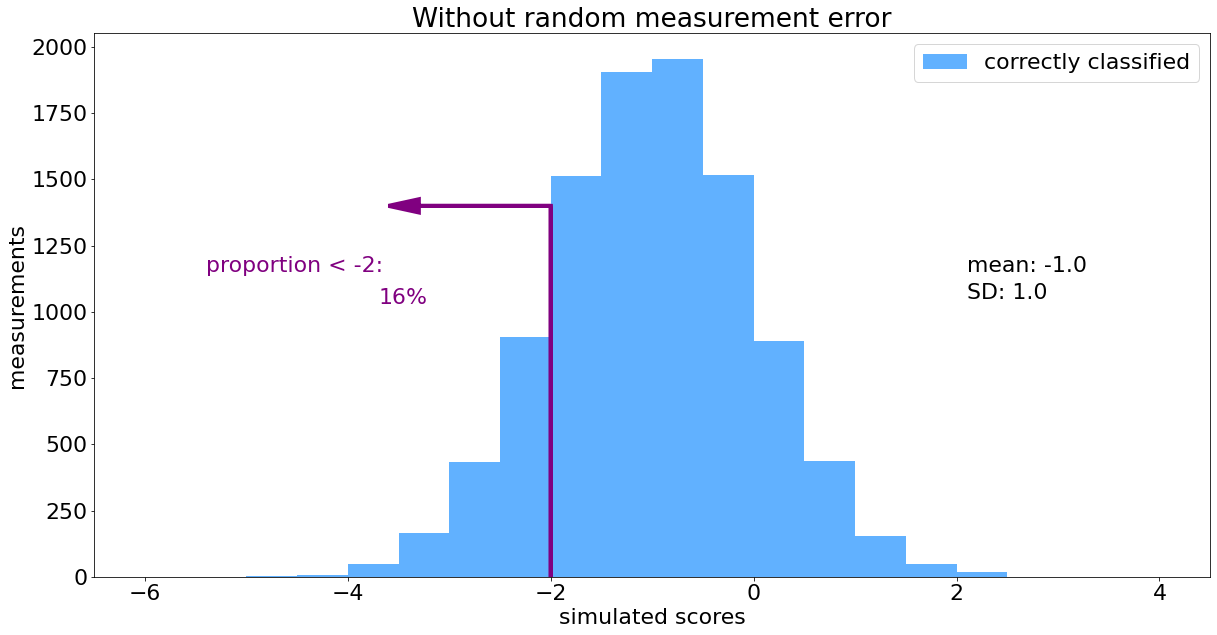

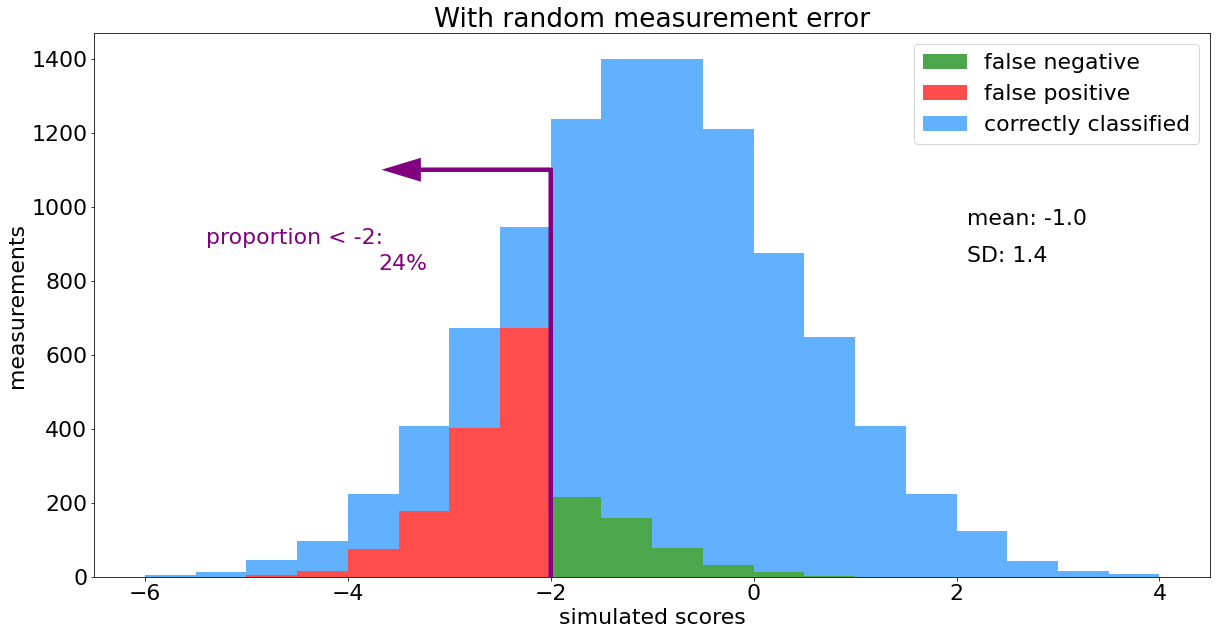

In [10]:
#Let's simulate a normal distribution with mean value -1 and st dev 1.  This is our 'truth' distribution.  Next, we directly add non-directional measurement and let's see how false positive vs false negative determinations turn out.
n=10000
myl = np.random.normal(-1.,1.,n)

df = pd.DataFrame(myl,columns=['original']) 
df['smear_val'] = np.random.normal(0.,1.,n)
df['smeared'] = df['original'] + df['smear_val']
new_df = df.apply(classify, axis=1)
myFP = new_df.copy()
myFP = myFP[myFP['class']=='fal_pos']

myFN = new_df.copy()
myFN = myFN[myFN['class']=='fal_neg']

myC = new_df.copy()
myC = myC[myC['class']!='fal_neg']
myC = myC[myC['class']!='fal_pos']

df['original'].hist(alpha=0.7,color='dodgerblue',bins=20,range=[-6.,4.],label='correctly classified')

pv = prevalence(df['original'].tolist(),-2.,0)

plt.xlabel('simulated scores')
plt.ylabel('measurements')
plt.legend()
plt.title('Without random measurement error')
plt.text(2.1,1150,'mean: %1.1f'%df.original.mean())
plt.text(2.1,1050,'SD: %1.1f'%df.original.std())
#plt.text(2.05,1150,'prevalence of')
#plt.text(2.05,1030,'z scores $\leq$ -2: %2.1f'%(pv*100.)+'%')
plt.text(-5.4,1150,'proportion < -2:',color='purple')
plt.text(-3.7,1030,'%2.0f'%(pv*100.)+'%',color='purple')

x1,x2,y1,y2=-2.,-2.,0,1400
plt.arrow(x1,x2,y1,y2,linewidth=4,color='purple')
x1,xdel,y1,ydel=-2.,-1.6,1400,0
plt.arrow(x1,y1,xdel,ydel,linewidth=4,head_width=50,head_length=0.3,length_includes_head=True,color='purple')

plt.grid(b=None)

plt.figure()

plt.rcParams['figure.figsize'] = [15,10]

plt.hist([myFN['smeared'],myFP['smeared'],myC['smeared']],
          bins=20, range=(-6.,4.), stacked=True,color=['g','r','dodgerblue'],alpha=0.7,label=['false negative','false positive','correctly classified'])

pv = prevalence(df['smeared'].tolist(),-2.,0)

plt.xlabel('simulated scores')
plt.ylabel('measurements')
plt.legend()
plt.title('With random measurement error')
plt.text(2.1,950,'mean: %1.1f'%new_df.smeared.mean())
plt.text(2.1,850,'SD: %1.1f'%new_df.smeared.std())
#plt.text(1.2,900,'prevalence of')
#plt.text(1.2,830,'z scores $\leq$ -2: %2.1f'%(pv*100.)+'%')
plt.text(-5.4,900,'proportion < -2:',color='purple')
plt.text(-3.7,830,'%2.0f'%(pv*100.)+'%',color='purple')

x1,x2,y1,y2=-2.,-2.,0,1100
plt.arrow(x1,x2,y1,y2,linewidth=4,color='purple')
x1,xdel,y1,ydel=-2.,-1.6,1100,0
plt.arrow(x1,y1,xdel,ydel,linewidth=4,head_width=50,head_length=0.3,length_includes_head=True,color='purple')

plt.grid(b=None)

### <font color='black'> The above cell demonstrates that for an anthropometric distribution with mean value -1.0 and a *true* st dev of 1.0, an additional st dev of 0.4 units results in more false positives than false negatives, and the measured prevalence rate of observations below -2.0 will be biased by +8%.  Let's see what happens when the mean value is on the other side of -2.0.</font> 

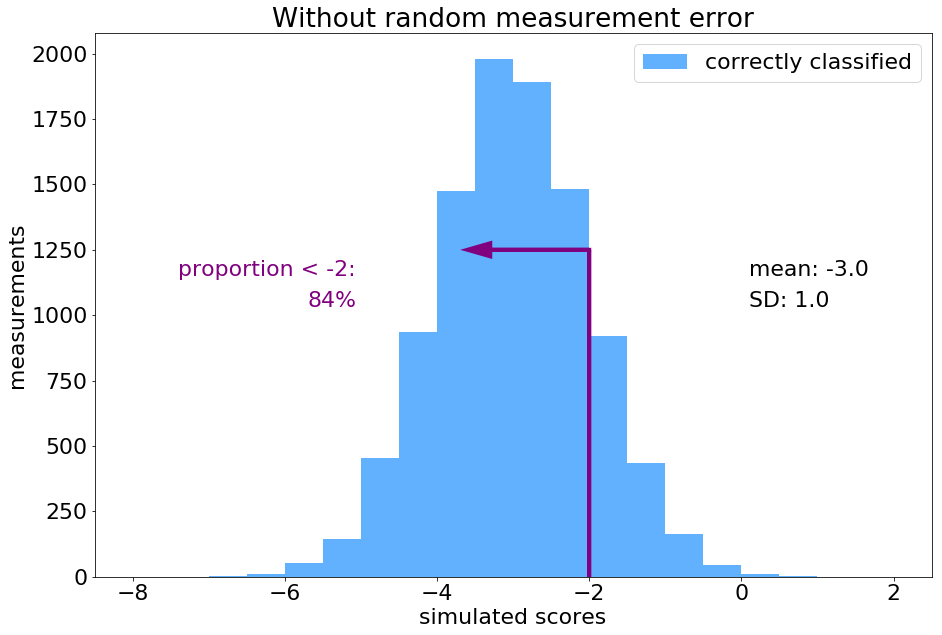

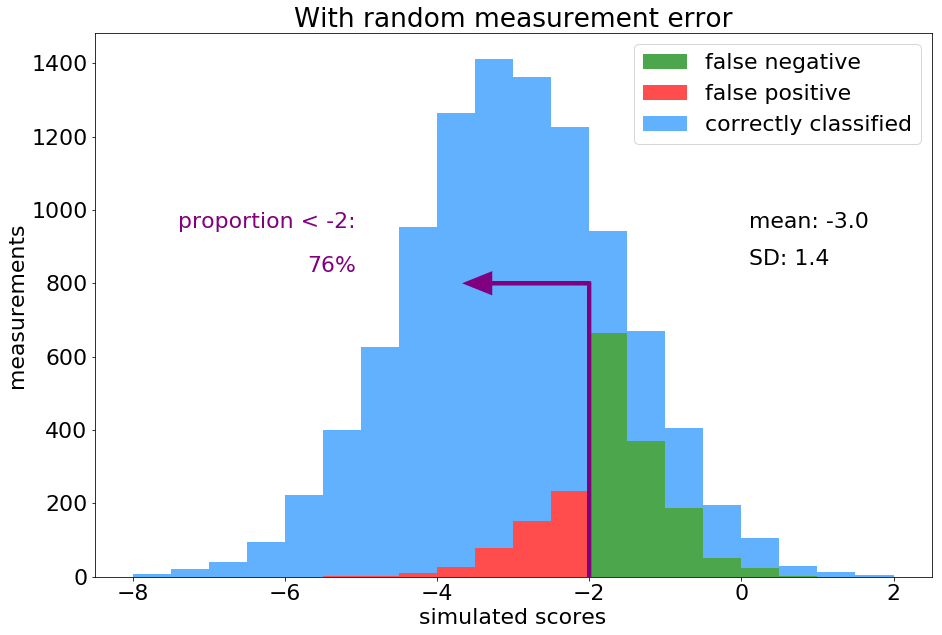

In [10]:
#Let's do it again with identical parameters with the exception of using a true distribution with mean value -3.0.
n=10000
myl2 = np.random.normal(-3.,1.,n)

df2 = pd.DataFrame(myl2,columns=['original']) 
df2['smear_val'] = np.random.normal(0.,1.,n)
df2['smeared'] = df2['original'] + df2['smear_val']

new_df2 = df2.apply(classify, axis=1)

myFP2 = new_df2.copy()
myFP2 = myFP2[myFP2['class']=='fal_pos']

myFN2 = new_df2.copy()
myFN2 = myFN2[myFN2['class']=='fal_neg']

myC2 = new_df2.copy()
myC2 = myC2[myC2['class']!='fal_neg']
myC2 = myC2[myC2['class']!='fal_pos']

df2['original'].hist(alpha=0.7,color='dodgerblue',bins=20,range=[-8.,2.],label='correctly classified')

pv = prevalence(df2['original'].tolist(),-2.,0)

plt.xlabel('simulated scores')
plt.ylabel('measurements')
plt.legend()
plt.title('Without random measurement error')
plt.text(0.1,1150,'mean: %1.1f'%df2.original.mean())
plt.text(0.1,1030,'SD: %1.1f'%df2.original.std())

plt.text(-5.4-2,1150,'proportion < -2:',color='purple')
plt.text(-3.7-2,1030,'%2.0f'%(pv*100.)+'%',color='purple')

x1,x2,y1,y2=-2.,-2.,0,1250
plt.arrow(x1,x2,y1,y2,linewidth=4,color='purple')
x1,xdel,y1,ydel=-2.,-1.6,1250,0
plt.arrow(x1,y1,xdel,ydel,linewidth=4,head_width=50,head_length=0.3,length_includes_head=True,color='purple')

plt.grid(b=None)

plt.figure()

plt.hist([myFN2['smeared'],myFP2['smeared'],myC2['smeared']],
          bins=20, range=(-8.,2.), stacked=True,color=['g','r','dodgerblue'],alpha=0.7,label=['false negative','false positive','correctly classified'])

plt.grid(b=None)

pv = prevalence(df2['smeared'].tolist(),-2.,0)

plt.xlabel('simulated scores')
plt.ylabel('measurements')
plt.legend()
plt.title('With random measurement error')
plt.text(0.1,950,'mean: %1.1f'%new_df2.smeared.mean())
plt.text(0.1,850,'SD: %1.1f'%new_df2.smeared.std())

plt.text(-5.4-2,1150-200,'proportion < -2:',color='purple')
plt.text(-3.7-2,1030-200,'%2.0f'%(pv*100.)+'%',color='purple')

x1,x2,y1,y2=-2.,-2.,0,800
plt.arrow(x1,x2,y1,y2,linewidth=4,color='purple')
x1,xdel,y1,ydel=-2.,-1.6,800,0
plt.arrow(x1,y1,xdel,ydel,linewidth=4,head_width=50,head_length=0.3,length_includes_head=True,color='purple')

### <font color='black'>Here we see similar results, but the sign of the bias is *negative* 8% now, meaning we would have  measured a lower prevalence rate compared to the true proportion present in the community studied.</font> 

## Assuming normality, clearly both the magnitude and sign of the prevalence bias depends on two quantites: (1) the distribution's standard deviation, and (2) the distribution's mean value.  Let's explore this three-dimensional this relationship more closely.

Text(0.5,1,'Proportion of scores falling below -2.0 sensitivity to mean and SD')

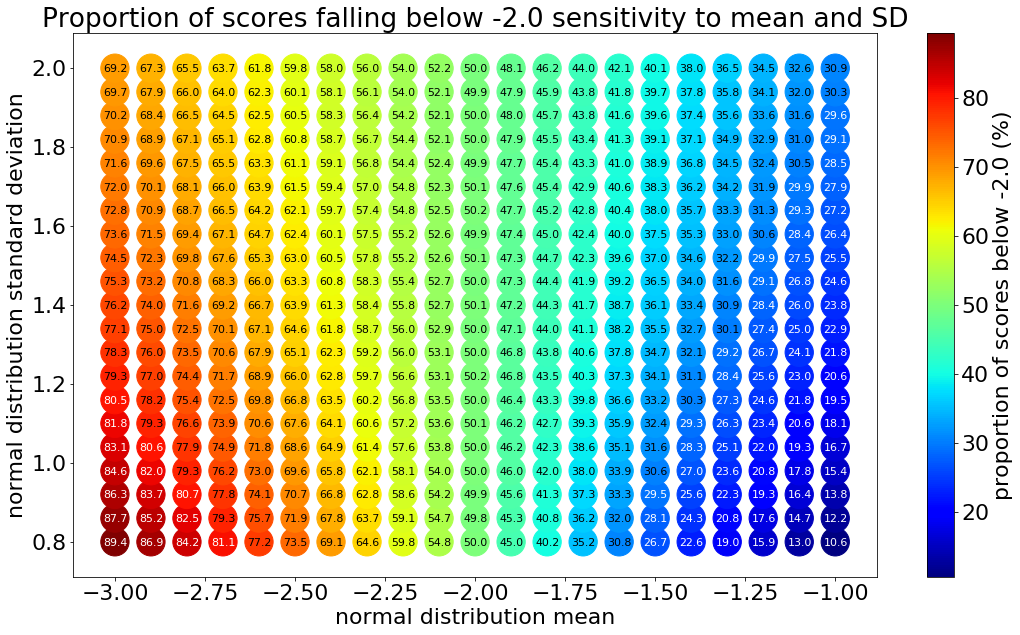

In [11]:
#Let's map out the relationship between a normal distribution's mean value, it's standard deviation, and the proportion of observations below -2.0 for parameter ranges relevant to historical children-under-5 anthropometric survey results
n_tst_mn = 20
n_tst_sd = 20
n = 300000

mn_dc = {}
sd_dc = {}
pv_dc = {}

mn_st = -2.0
mn_st = -3.0
mn_nd = -1.0
mn_sp = (mn_nd - mn_st) / float(n_tst_mn)

sd_st = 0.8
sd_nd = 2.
sd_sp = (sd_nd - sd_st) / float(n_tst_sd)

obs=0
ref = 0.

for i in range(0,n_tst_mn+1):
    mn = mn_st + float(i*mn_sp) 
    for j in range(0,n_tst_sd+1):
        sd = sd_st + float(j*sd_sp) 
        
        ar = np.random.normal(mn, sd, n)
        
        pv = prevalence(ar,-2.,0)
        
        mn_dc[obs] = mn
        sd_dc[obs] = sd
        pv_dc[obs] = pv
        
        obs+=1
        
my_dict = {'mn': mn_dc,'sd': sd_dc,'pv': pv_dc}
my_df = pd.DataFrame.from_dict(my_dict)

my_df.pv *= 100.

plt.rcParams['figure.figsize'] = [18,10]

fig, ax = plt.subplots()

plt.scatter(x=my_df.mn,y=my_df.sd, c=my_df.pv,cmap='jet',s=800)
cbar=plt.colorbar()
cbar.set_label('proportion of scores below -2.0 (%)')
plt.xlabel('normal distribution mean')
plt.ylabel('normal distribution standard deviation')

off = -0.033

for i in range(0,len(pv_dc)):

    #convince the text labels to show up well on the graph
    if (pv_dc[i]>0.8) or (pv_dc[i]<0.30):
        ax.annotate('%1.1f'%(pv_dc[i]*100.), (mn_dc[i]+off, sd_dc[i]-0.01),size=11,color='w')
    
    else:
        ax.annotate('%1.1f'%(pv_dc[i]*100.), (mn_dc[i]+off, sd_dc[i]-0.01),size=11,color='k')
        
plt.grid(b=None)
        
plt.title('Proportion of scores falling below -2.0 sensitivity to mean and SD')

### <font color='black'>So, what can we do with this information?  Fortunately, there exists guidance in the literature that indicates the vast majority of standard deviations found in anthropometric distributions known to have minimal non-directional measurement error fall between 0.8 and 1.2 z-score units.**</font>

### <font color='red'>This indicates that any surveys reporting anthropometric standard deviations significantly larger than 1.2 z-score units were likely influenced by measurement error and, due to the principle demonstrated earlier, the output prevalence rate may be untrustworthy.</font>

### <font color='red'>Fortunately, the simulation tool shown earlier can be used to estimate the scale of this bias to quantify how much these measurement errors may have influenced the prevalence results.  Let's pursue this next.  The below three-dimensional relationship between an anthropomorphic distribution's mean value, its standard deviation, and the prevalence bias of observations below -2.0 assumes the standard deviation *would have been* 1.0 in the absence of non-directional measurement error.  This parameter estimate of 1.0 is a simple midpoint of the stated reasonable range found in the literature of 0.8 - 1.2.  Therefore this should be considered an improved approach, not a perfect one.  A possible improvement extension of this analysis could include estimating the bias using not only the midpoint, but also the edge range values of 0.8 and 1.2 to give a sense for the span of possible biases.</font>

** See, for example: Mercedes de Onis, Edward A. Frongillo, and Monika Blossner, Bulletin of the World Health Organization, 2000, 78: 1222–1233.

Text(0.5,1,'Potential prevalence biases due to non-directional measurement error')

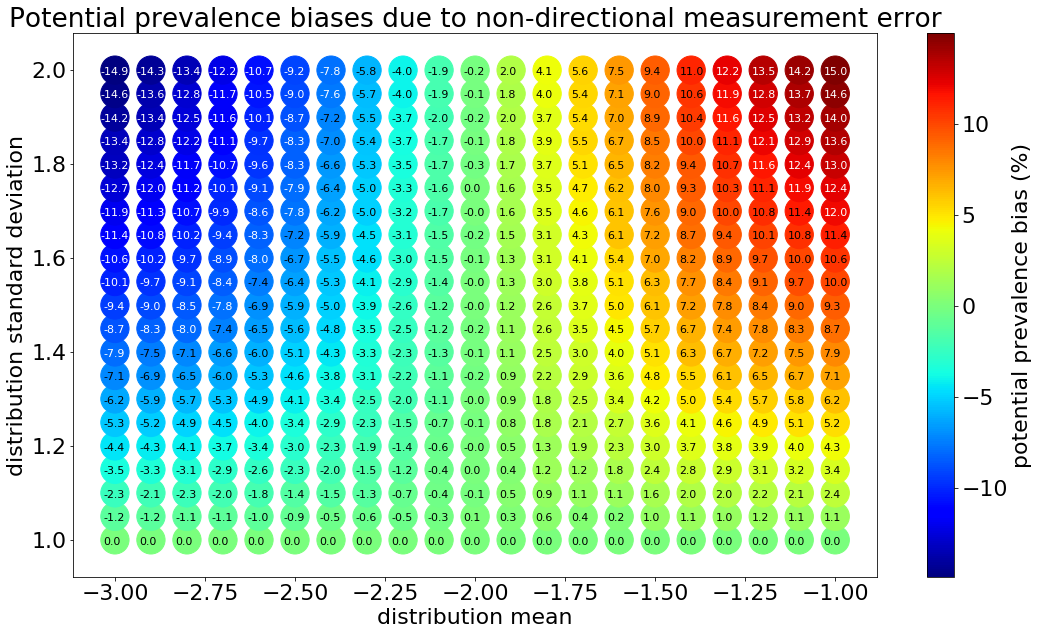

In [12]:
#Let's simulate as before, but let's take the st dev = 1.0 (that is, the midpoint between 0.8 and 1.2) prevalence rate for each mean value considered as the reference value and calculate all biases relative to this rate.
n_tst_mn = 20
n_tst_sd = 20
n = 300000

mn_dc = {}
sd_dc = {}
pv_dc = {}
pv_ref = {}

mn_st = -2.0
mn_st = -3.0
mn_nd = -1.0
mn_sp = (mn_nd - mn_st) / float(n_tst_mn)

sd_st = 1.0
sd_nd = 2.
sd_sp = (sd_nd - sd_st) / float(n_tst_sd)

obs=0
ref = 0.
ci_ref = 0.

for i in range(0,n_tst_mn+1):
    mn = mn_st + float(i*mn_sp) 
    for j in range(0,n_tst_sd+1):
        sd = sd_st + float(j*sd_sp) 
        
        ar = np.random.normal(mn, sd, n)
        
        pv = prevalence(ar,-2.,0)
        
        if j==0:
            ref=pv
        
        mn_dc[obs] = mn
        sd_dc[obs] = sd
        pv_dc[obs] = pv
        pv_ref[obs] = pv - ref
        
        obs+=1
        
my_dict = {'mn': mn_dc,'sd': sd_dc,'pv': pv_dc,'pv_rf':pv_ref,}
my_df2 = pd.DataFrame.from_dict(my_dict)

my_df2.pv *= 100.
my_df2.pv_rf *= 100.

plt.grid(b=None)

ax = plt.gca()

plt.scatter(x=my_df2.mn,y=my_df2.sd, c=my_df2.pv_rf,cmap='jet',s=800)
cbar=plt.colorbar()
cbar.set_label('potential prevalence bias (%)')
plt.xlabel('distribution mean')
plt.ylabel('distribution standard deviation')
off = -0.033
for i in range(0,len(pv_dc)):

    #convince the text labels to show up well on the graph
    if (pv_ref[i]>0.115) or (pv_ref[i]<-0.075):
        if pv_ref[i]>-0.099:
            ax.annotate('%1.1f'%(pv_ref[i]*100.), xy=(mn_dc[i]+off, sd_dc[i]-0.01),size=11,color='w')
        else:
            ax.annotate('%1.1f'%(pv_ref[i]*100.), xy=(mn_dc[i]+off-0.007, sd_dc[i]-0.01),size=11,color='w')
    else:
        ax.annotate('%1.1f'%(pv_ref[i]*100.), xy=(mn_dc[i]+off, sd_dc[i]-0.01),size=11,color='k')        
    
plt.title('Potential prevalence biases due to non-directional measurement error')

### <font color='red'>It is clear from the pattern shown above that the prevalence bias sensitivity to non-directional measurement error depends strongly on the mean of the distribution.  Prevalence rates for distributions with mean value -2.0, for example, are completely insensitive to non-directional measurement error (since, in this case, 50% of all scores with fall above and below -2.0 regardless of the distribution's width), while the sensitivity grows for distributions with mean values increasingly far from -2.0 in either direction.</font>

### <font color='red'>This indicates a 'danger zone' for prevalence biases the community should be mindful of: when a measured anthropometric standard deviation is well above 1.2 and whose mean value is relatively far from -2.0, the potential for prevalence bias is maximal.</font>

## To move this study beyond an intellectual exercise, let's move onto item (3) in the overall analysis structure and consider meta-analysis possibilities among the 21 population-based surveys collected in support of Food For Peace (FFP) Development Food Security Activity (DFSA) evaluations.

### <font color='red'>Let's focus on height-for-age distributions and stunting rates.  Measurement error can creep into this distribution from either the measured height distribution or the age distribution.  The height distributions showed no convincing evidence of measurement error (not shown here).  However, consider the following shape comparison of all 21 age distributions.</font>
(NOTE: FOR BETTER READABILITY, SURVEY DATA ARE ACCESSED, CLEANED AND STANDARDIZED BELOW THIS ANALYSIS WALK-THROUGH).

Text(0.5,1,'All 21 FFP DFSA age distributions (shape-only comparison)')

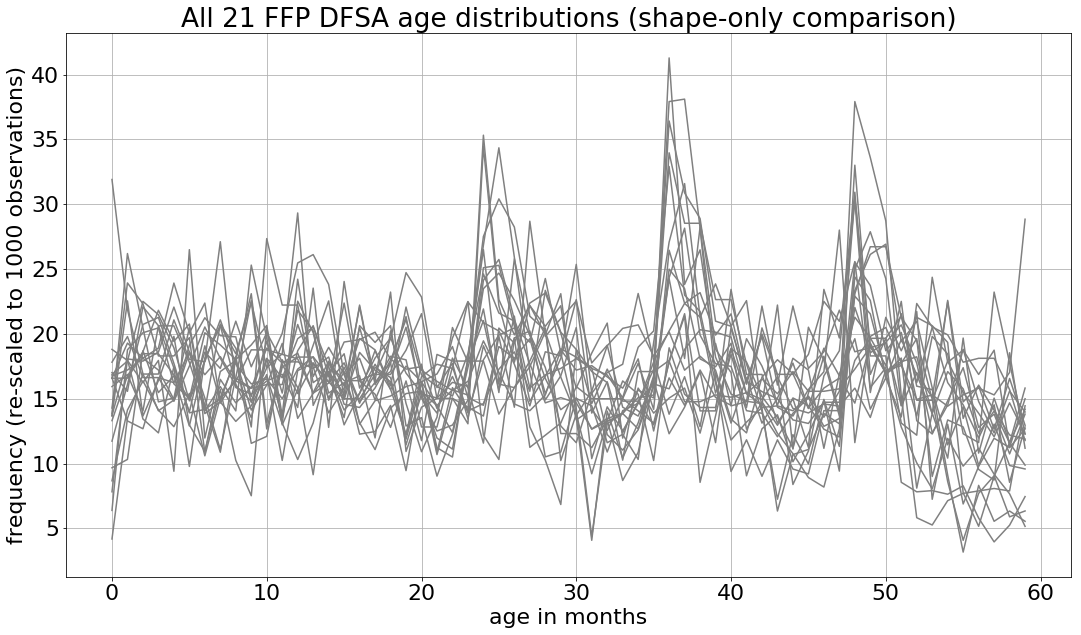

In [38]:
overlay(ug_chn_18.cage_months)
overlay(all_ug_el_age)
overlay(ug_bl_chn.agemos)
overlay(zim_bl_chn.agemos)
overlay(zim_el_chn.agemos)
overlay(bng_chn.age_months)
overlay(bur_chn.agemos)
overlay(drc_chn.cage_months)
overlay(eth_bl_chn.cage_months)
overlay(eth_el_chn.cage_months)
overlay(gt_bl_chn.agemos)
overlay(gt_el_chn.cage_months)
overlay(ht_chn.agemos)
overlay(ni_bl_chn.agemos)
overlay(ni_el_chn.cage_months)
overlay(mad_bl_chn.agemos)
overlay(mad_el_chn.D70)
overlay(mal_bl_chn.agemons)
overlay(mal_el_chn.D70)
overlay(nep_chn.age_months)
overlay(mali_chn.age_months)
plt.xlabel('age in months')
plt.ylabel('frequency (re-scaled to 1000 observations)')
plt.title('All 21 FFP DFSA age distributions (shape-only comparison)')

### <font color='red'>Notice the conspicuous frequency peaks around the months of 24, 36, and 48 months.  Let's isolate and identify the six most egregious examples.</font>

Text(0,0.5,'frequency (re-scaled to 1000 observations)')

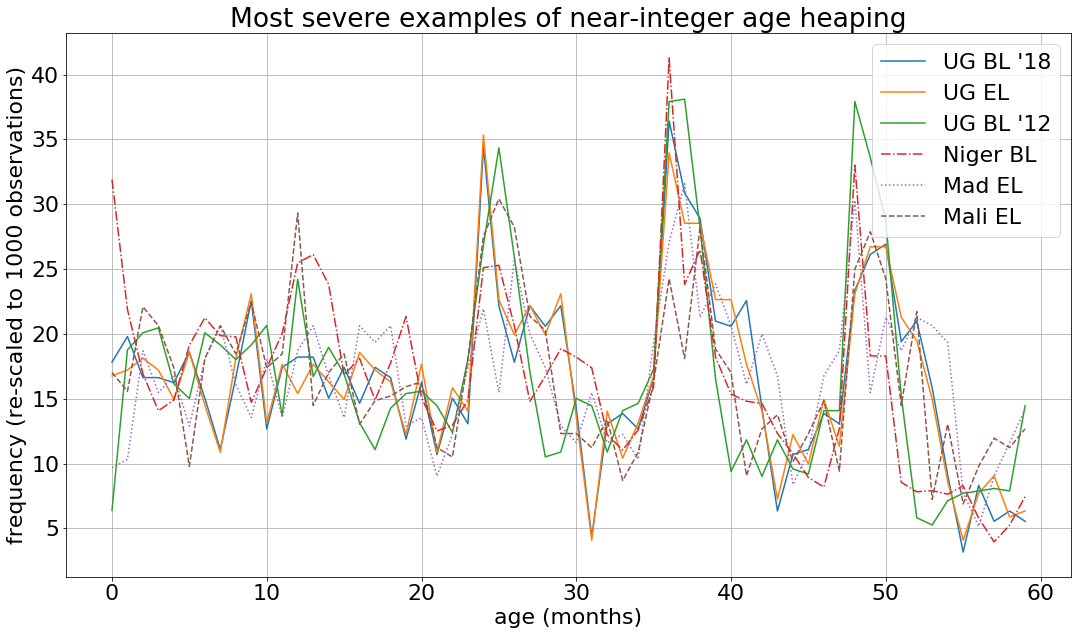

In [39]:
histpars =np.histogram(ug_chn_18.cage_months,bins=60,range=[0,60])
mysum = np.sum(histpars[0])
renorm = histpars[0] / float(mysum) * 1000.
myx = histpars[1][:-1]
plt.plot(myx,renorm,label='UG BL \'18')

histpars =np.histogram(all_ug_el_age,bins=60,range=[0,60])
mysum = np.sum(histpars[0])
renorm = histpars[0] / float(mysum) * 1000.
myx = histpars[1][:-1]
plt.plot(myx,renorm,label='UG EL')

histpars =np.histogram(ug_bl_chn.agemos,bins=60,range=[0,60])
mysum = np.sum(histpars[0])
renorm = histpars[0] / float(mysum) * 1000.
myx = histpars[1][:-1]
plt.plot(myx,renorm,label='UG BL \'12')

histpars =np.histogram(ni_bl_chn.agemos,bins=60,range=[0,60])
mysum = np.sum(histpars[0])
renorm = histpars[0] / float(mysum) * 1000.
myx = histpars[1][:-1]
plt.plot(myx,renorm,linestyle='dashdot',label='Niger BL')

histpars =np.histogram(mad_el_chn.D70,bins=60,range=[0,60])
mysum = np.sum(histpars[0])
renorm = histpars[0] / float(mysum) * 1000.
myx = histpars[1][:-1]
plt.plot(myx,renorm,linestyle='dotted',label='Mad EL')

histpars =np.histogram(mali_chn.age_months,bins=60,range=[0,60])
mysum = np.sum(histpars[0])
renorm = histpars[0] / float(mysum) * 1000.
myx = histpars[1][:-1]
plt.plot(myx,renorm,linestyle='--',label='Mali EL')

plt.legend()
plt.title('Most severe examples of near-integer age heaping')
plt.xlabel('age (months)')
plt.ylabel('frequency (re-scaled to 1000 observations)')


### <font color='red'>In some distributions the peaks are quite strong, and in some they are entirely absent.  This feature is a known marker of age-related measurement error, and is likely the result of some combination of local administrative birth records capacity, poor local calendar translations, and varying cultural value placed on birth date accuracy.</font>

### <font color='red'>Let's now quantify the level of frequency 'heaping' around these integer-year ages by forming the ratio of observations found in the nine bins nearby these ages compared to the total.  The cell below visualizes examples of surveys found to contain a high 'age heaping' ratio and a low ratio among the datasets studied.  Note that if the age distribution were completely homogeneous, this ratio would be 9/60 = 15%.</font>

Text(45,123,'14.2%')

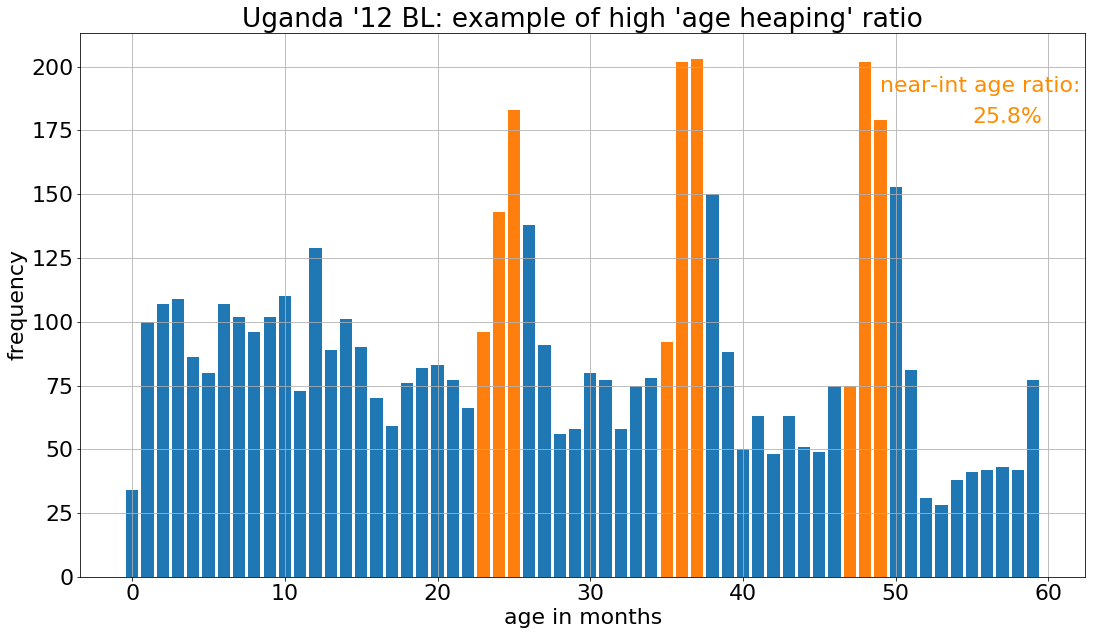

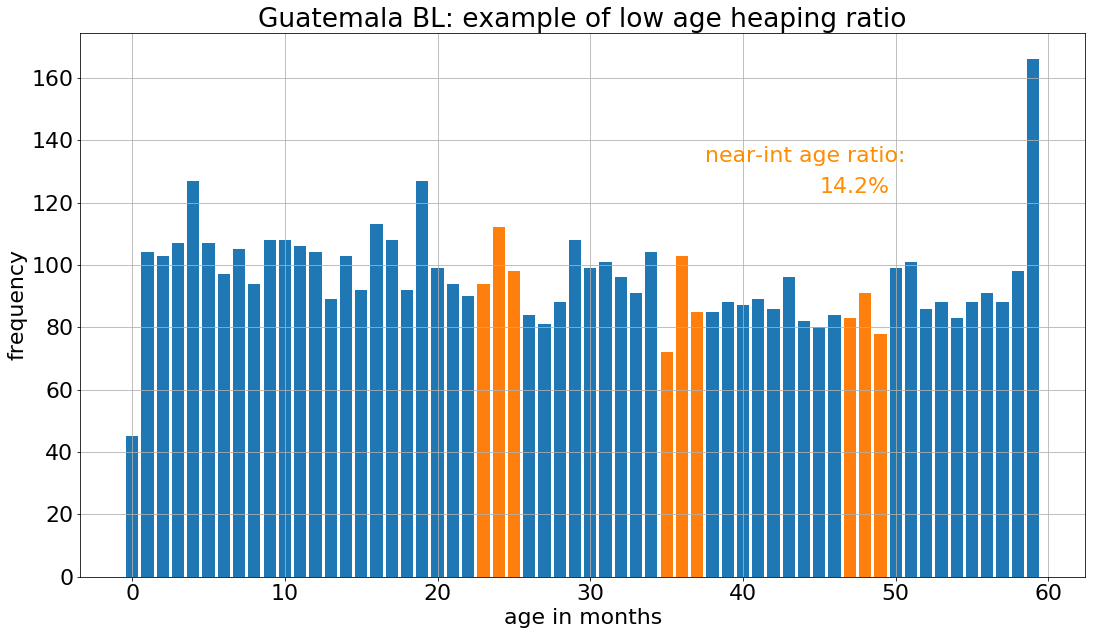

In [40]:
show_bmps(ug_bl_chn.agemos)
plt.title('Uganda \'12 BL: example of high \'age heaping\' ratio')
plt.xlabel('age in months')
plt.ylabel('frequency')
plt.text(49,190,'near-int age ratio:',color='darkorange')
plt.text(55,178,'%2.1f'%(resids_bmp_frac[2]*100.)+'%',color='darkorange')

plt.figure()

show_bmps(gt_bl_chn.agemos)
plt.title('Guatemala BL: example of low age heaping ratio')
plt.xlabel('age in months')
plt.ylabel('frequency')
plt.text(37.5,133,'near-int age ratio:',color='darkorange')
plt.text(45,123,'%2.1f'%(resids_bmp_frac[10]*100.)+'%',color='darkorange')

### <font color='red'>Having quantified this phenomenon, let's examime whether there exists a relationship between this derived parameter and the standard deviation of the relevant height-for-age distribution.  Recall that 'age heaping' is a known marker of measurement errors, and the standard deviation value is known to be sensitive to the amount of measurement error in the underlying data.</font>

Text(0,0.5,'height-for-age standard deviation')

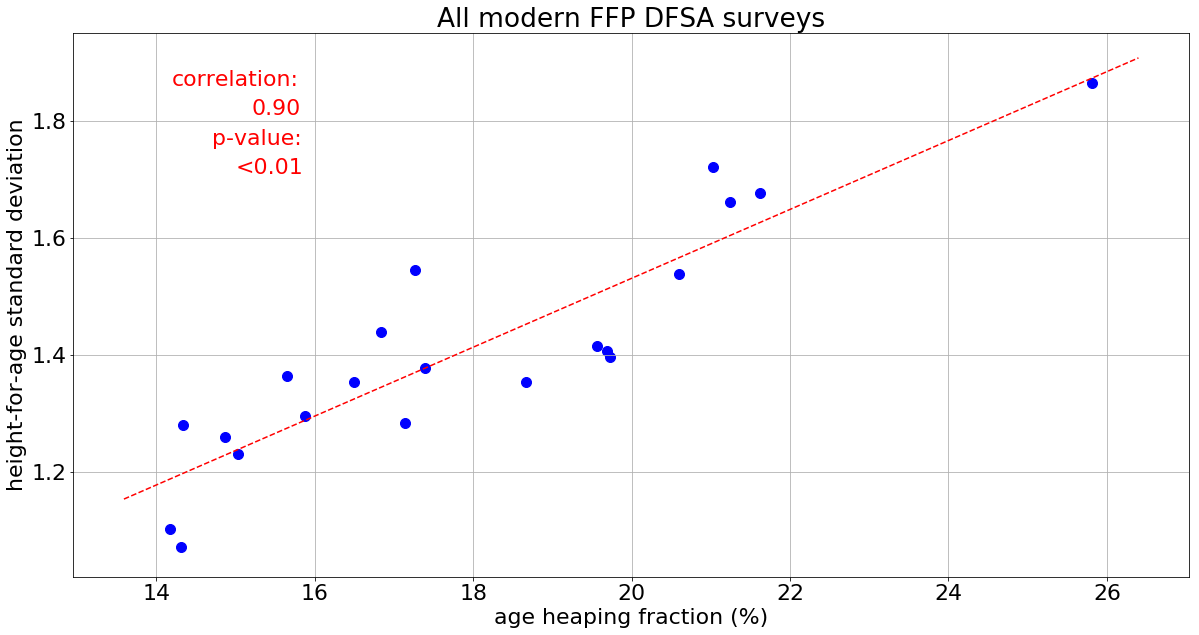

In [41]:
plt.rcParams['figure.figsize'] = [20,10]
plt.title('All modern FFP DFSA surveys')
plt.scatter(x=resids_bmp_fracM,y=stds,s=100,c='b',label='FFP DFSA')
x = resids_bmp_fracM
y = stds
model = np.polyfit(x, y, 1)
intercept=model[1]
slope=model[0]
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--',c='r')
rng = len(resids_bmp_fracM)
plt.text(14.2,1.86,'correlation:',color='r')
plt.text(15.2,1.81,'%1.2f'%corr[0],color='r')
plt.text(14.7,1.76,'p-value:',color='r')
if corr[1]<0.01:
    plt.text(15.,1.71,'<0.01',color='r')
else:
    plt.text(15.,1.71,'%2.1f'%corr[1],color='r')
plt.xlabel('age heaping fraction (%)')
plt.ylabel('height-for-age standard deviation')

### <font color='red'>Remarkable!  There exists a surprisingly strong and highly significant correlation (&rho;=0.90) between these parameters.  Before interpretating this result, let's add context labels to this image to see where individual surveys fall.</font>

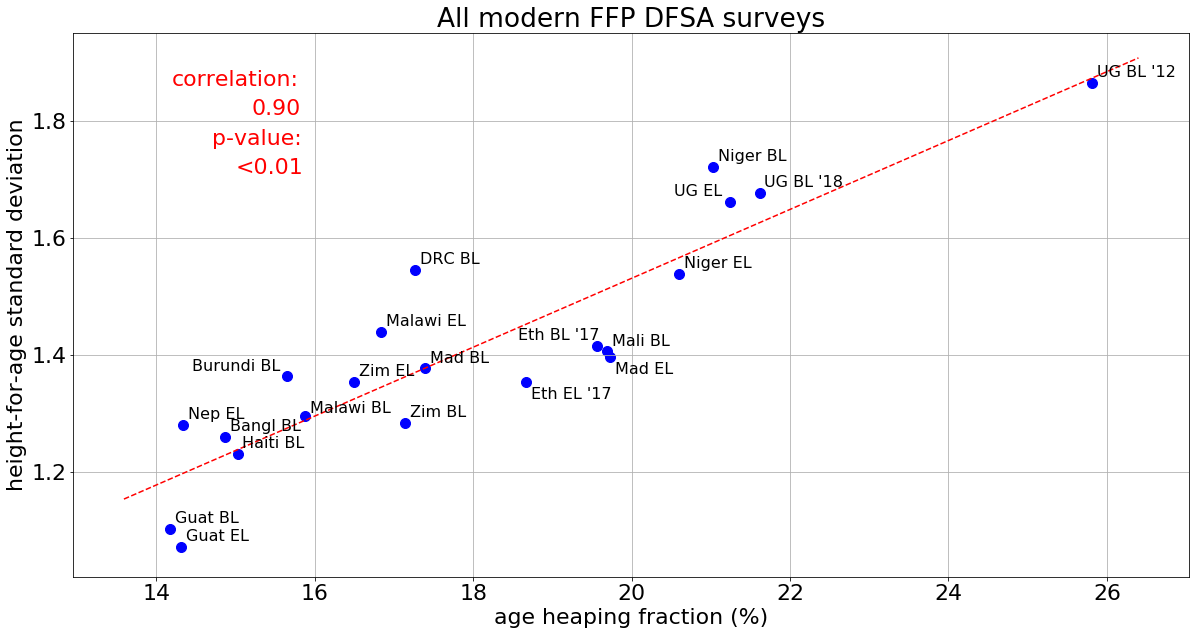

In [42]:
plt.title('All modern FFP DFSA surveys')
plt.scatter(x=resids_bmp_fracM,y=stds,s=100,c='b',label='FFP DFSA')
print_survey_labels(rng,cnt,resids_bmp_fracM,stds)
plt.xlabel('age heaping fraction (%)')
plt.ylabel('height-for-age standard deviation')
plt.text(14.2,1.86,'correlation:',color='r')
plt.text(15.2,1.81,'%1.2f'%corr[0],color='r')
plt.text(14.7,1.76,'p-value:',color='r')
if corr[1]<0.01:
    plt.text(15.,1.71,'<0.01',color='r')
else:
    plt.text(15.,1.71,'%2.1f'%corr[1],color='r')
plt.plot(x_vals, y_vals, '--',c='r')

### <font color='red'>Given that the age distribution is one of just two critical measured quantities input to the height-for-age distribution, I believe we have enough information here to conclude that this relationship is *causal*.  That is, among these surveys a strong determinant of the height-for-age standard deviation value is age-related non-directional measurement error manifested as 'age heaping'.  This also indicates the height-for-age standard deviation values are artificially inflated and so do not represent the true height-for-age heterogeneity present in the communities studied.</font>

### <font color='red'>Recall the earlier demonstration that artificialy inflated standard deviation values can significantly bias threshold-based prevalence indicators such as stunting.  To get a sense of the range of potential biases that may have affected the stunting prevalence outputs from these surveys, let's now overlay the 'bias map' formed earlier with markers for the relevant 21 FFP DFSA height-for-age parameters.</font>

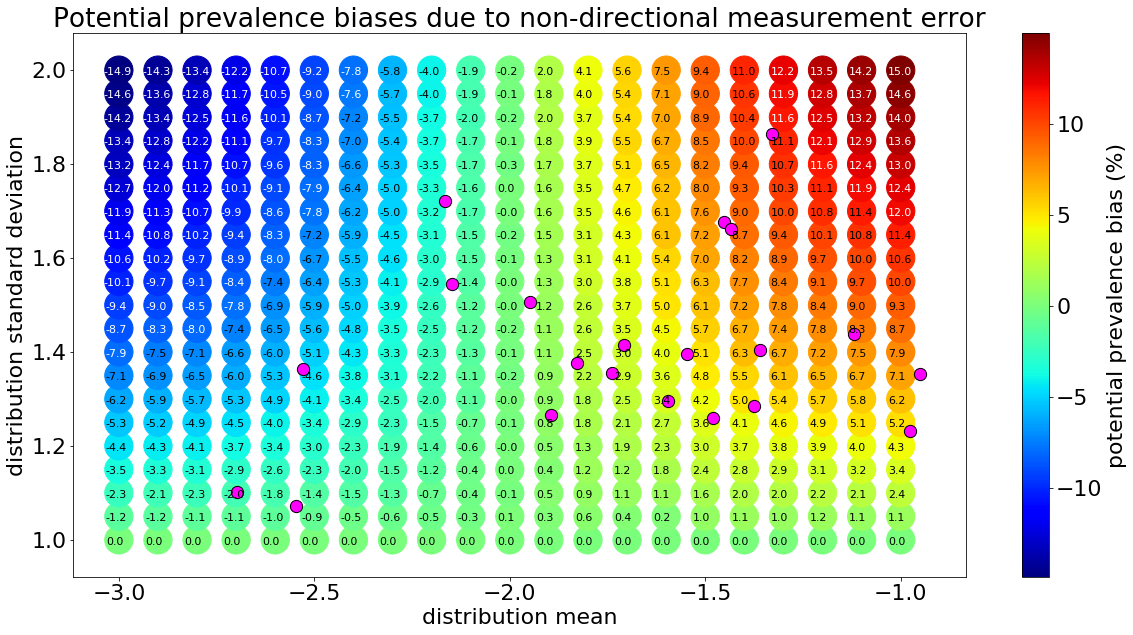

In [43]:
plt.grid(b=None)

ax = plt.gca()

plt.scatter(x=my_df2.mn,y=my_df2.sd, c=my_df2.pv_rf,cmap='jet',s=800)
cbar=plt.colorbar()
cbar.set_label('potential prevalence bias (%)')
plt.xlabel('distribution mean')
plt.ylabel('distribution standard deviation')
off = -0.033
for i in range(0,len(pv_dc)):

    #convince the text labels to show up well on the graph
    if (pv_ref[i]>0.115) or (pv_ref[i]<-0.075):
        if pv_ref[i]>-0.099:
            ax.annotate('%1.1f'%(pv_ref[i]*100.), xy=(mn_dc[i]+off, sd_dc[i]-0.01),size=11,color='w')
        else:
            ax.annotate('%1.1f'%(pv_ref[i]*100.), xy=(mn_dc[i]+off-0.007, sd_dc[i]-0.01),size=11,color='w')
    else:
        ax.annotate('%1.1f'%(pv_ref[i]*100.), xy=(mn_dc[i]+off, sd_dc[i]-0.01),size=11,color='k')        
    
plt.title('Potential prevalence biases due to non-directional measurement error')

plt.scatter(x=ffp_chn.mn,y=ffp_chn.stds,color='magenta',edgecolors='k',s=150)

### <font color='red'>Note the estimated prevalence bias associated with some surveys are within stated confidence intervals of a few percentage points, while most are much larger.  The context of these surveys are baseline and endline performance evaluations of five-year development programs, where a common goal is a reduction of stunting prevalence in the population of one percentage point per year.  Since the baseline and endline surveys may fall on different locations on this bias map, differential biases between baseline and endline surveys may partially or completely obscure the research team's ability to detect change consistent with this target reduction.  Note this approach does not address the challenge of directional measurement errors.</font>

### <font color='red'>I'd like to offer a final piece of evidence supporting the claim that the children-under-five (CU5) height-for-age distribution's standard deviation value among these surveys has been artificially inflated by age-related measurement error (and therefore their output stunting prevalence rates may be significantly biased).  In the surveys studied here, it was common to collect anthropometric measurements of women of reproducting age (WRA) who live in the same home as CU5.  It is well-known that health and nutritional status among family members are correlated.  Therefore, we might expect the WRA height-for-age distribution parameters to be similar to CU5.  The histograms below show the distribution of standard deviations found among each demographic.</font>

Note: height-for-age for adults is not a typical indicator, but can be easily formed by using the parameters for the eldest age range (19.0 years) considered in the 2007 World Health Organization study.  Since there is no expected growth pattern in adulthood, no other parameters are needed to translate adult heights into height-for-age values.

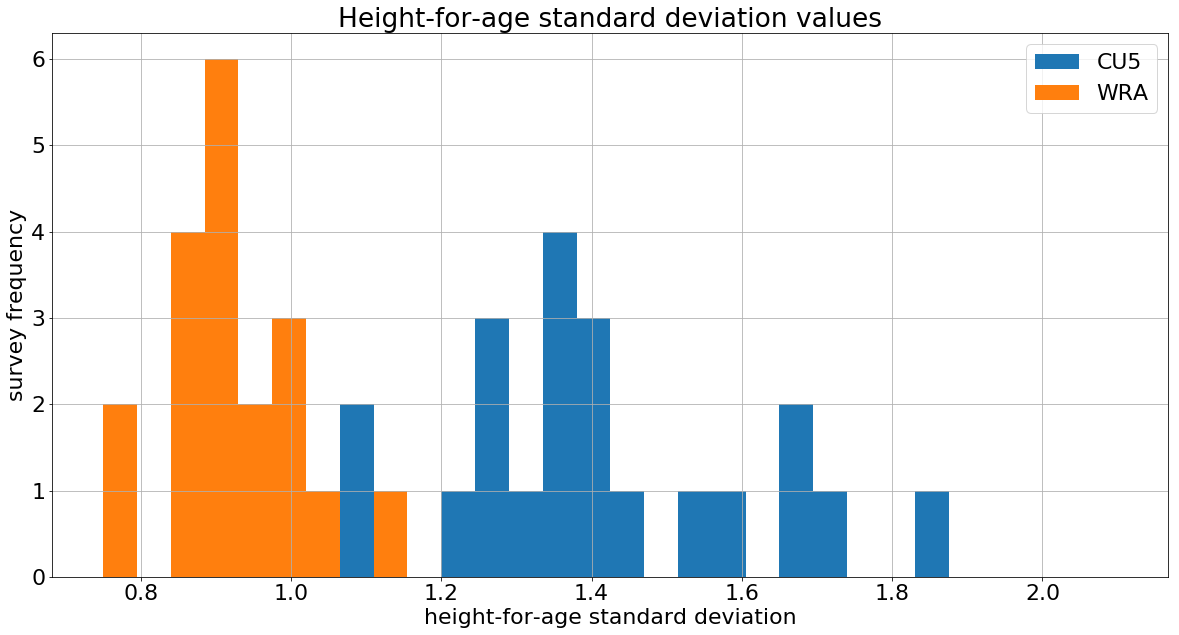

In [45]:
ffp_std_summ.chn_std.hist(range=[0.75,2.1],bins=30,label='CU5')
ffp_std_summ.wm_std.hist(range=[0.75,2.1],bins=30,label='WRA')
plt.xlabel('height-for-age standard deviation')
plt.ylabel('survey frequency')
plt.title('Height-for-age standard deviation values')
plt.legend()

### <font color='red'>As we've seen previously, the CU5 standard deviation values are typically well above 1.2, the rough upper limit for results with minimal data quality challenges.  However, the standard deviation values for WRA almost exclusively fall between 0.8 and 1.2, the same range expected for high-quality data.  Because the CU5 data is highly sensitive to age accuracy while the adult data is entirely insensitive (since, again, there is no expected growth pattern in adulthood and WRA age is not an input to this distribution - the only requirement is that they're older than 19.0 years), this comparison suggests age-related data quality challenges may be *entirely* responsible for the observed inflated CU5 standard deviations observed.</font>

### <font color='red'>While this test by itself is not definitive, this observation independently supports the clear evidence presented above demonstrating that non-directional age measurement errors are responsible for artificially inflating the standard deviation of CU5 height-for-age distributions in the surveys studied.</font>

## <font color='blue'>In conclusion, there is strong evidence here that age-related measurement error has significantly influenced many stunting prevalence rate results from among the 21 FFP DFSA surveys considered.  A simulation campaign based on literature guidance estimates these biases and shows that the magnitude and direction of bias depends strongly on the distribution's mean and standard deviation value. </font>

## <font color='blue'>In the future, survey teams should be wary of the implications discussed here and particularly so if the population of interest is known to have imperfect birth record administrative systems.  The research teams should regularly inspect for the 'age heaping' phenomenon and release the age distribution in the final report**.  While there may be a limit to how much research teams can encourage better age data accuracy in the short term, the analysis technique presented here could be used to evaluate and report on how much these challenges may have influenced the final measured prevalence rate, regardless of the source of measurement error.  Finally, to most accurately represent the population of interest in situations of likely significant prevalence biases due to non-directional measurement error, the research team could consider using parameters unaffected by such issues such as the distribution's mean value.</font>

### **The age distribution was not released in any of the reports associated with the surveys studied here

# ----------------------------------------------------------------------------------------------------------------------
### End of analysis narrative.  Below shows the  accessing, sanitizing, and standardizing of FFP DFSA survey data

In [13]:
# from WHO 2007 publication (units are cm): 
wm_avg = 163.20
wm_std = 6.54
# taken from: https://www.who.int/docs/default-source/child-growth/growth-reference-5-19-years/height-for-age-(5-19-years)/sft-hfa-girls-z-5-19years.pdf?sfvrsn=65c549dc_4

In [14]:
myfile = 'BL_EL_data/Uganda_BL_FY18/datasets/FFP_UG_BL_PERSONS_FINAL.csv'
ug_bl_18 = pd.read_csv(myfile)

ug_chn_18 = ug_bl_18.copy()
ug_chn_18.replace('Flagged cases',NaN,inplace=True)
ug_chn_18.replace(' ',NaN,inplace=True)
ug_chn_18.dropna(subset=['d72'], inplace=True)
ug_chn_18.d_haz = ug_chn_18.d_haz.astype(float) 
ug_chn_18.d_waz = ug_chn_18.d_waz.astype(float) 
ug_chn_18 = ug_chn_18[ug_chn_18['d_haz']<2000.]
ug_chn_18.d_haz = ug_chn_18.d_haz / 100.
ug_chn_18 = ug_chn_18[ug_chn_18['d_waz']<2000.]
ug_chn_18.d_waz = ug_chn_18.d_waz / 100.

wm_ht = 'e53'
wm_cp = ug_bl_18.copy()
wm_cp = wm_cp[wm_cp['e_result']==1]
wm_cp = wm_cp[wm_cp[wm_ht]<800.]
wm_haz = (wm_cp[wm_ht] - wm_avg) / wm_std

ug_bl_18_wm_std = wm_haz.std()

In [15]:
myfile = 'BL_EL_data/Uganda_EL_FY18/datasets/GHG/FFP_UG_EL_PERSONS_FINAL_GHG.csv'
ug_el_ghg = pd.read_csv(myfile)

ug_el_chn = ug_el_ghg.copy()
ug_el_chn.replace('Flagged cases',NaN,inplace=True)
ug_el_chn.dropna(subset=['d72'], inplace=True)
ug_el_chn.d_haz = ug_el_chn.d_haz.astype(float) 
ug_el_chn.d_waz = ug_el_chn.d_waz.astype(float) 
ug_el_chn = ug_el_chn[ug_el_chn['d_haz']<2000.]
ug_el_chn = ug_el_chn[ug_el_chn['d_waz']<2000.]
ug_el_chn.d_haz = ug_el_chn.d_haz / 100.
ug_el_chn.d_waz = ug_el_chn.d_waz / 100.

wm_ht = 'e53'
wm_cp = ug_el_ghg.copy()
wm_cp = wm_cp[wm_cp['e_result']==1]
wm_cp = wm_cp[wm_cp[wm_ht]<800.]
wm_haz_ghg = (wm_cp[wm_ht] - wm_avg) / wm_std

In [16]:
myfile = 'BL_EL_data/Uganda_EL_FY18/datasets/RWANU/FFP_UG_EL_PERSONS_FINAL_RWANU.csv'
ug_el_rwa = pd.read_csv(myfile)

ug_el_rwa_chn = ug_el_rwa.copy()
ug_el_rwa_chn.replace('Flagged cases',NaN,inplace=True)
ug_el_rwa_chn.d_haz = ug_el_rwa_chn.d_haz.astype(float) 
ug_el_rwa_chn.d_waz = ug_el_rwa_chn.d_waz.astype(float) 
ug_el_rwa_chn = ug_el_rwa_chn[ug_el_rwa_chn['d_haz']<2000.]
ug_el_rwa_chn.d_haz = ug_el_rwa_chn.d_haz / 100.
ug_el_rwa_chn = ug_el_rwa_chn[ug_el_rwa_chn['d_waz']<2000.]
ug_el_rwa_chn.d_waz = ug_el_rwa_chn.d_waz / 100.

wm_ht = 'e53'
wm_cp = ug_el_rwa.copy()
wm_cp = wm_cp[wm_cp['e_result']==1]
wm_cp = wm_cp[wm_cp[wm_ht]<800.]
wm_haz_rwa = (wm_cp[wm_ht] - wm_avg) / wm_std

all_ug_el_wm_haz = wm_haz_rwa.append(wm_haz_ghg)

ug_el_wm_std = all_ug_el_wm_haz.std()

all_ug_el_age = ug_el_rwa_chn.cage_months.append(ug_el_chn.cage_months)
all_ug_el_haz = ug_el_rwa_chn.d_haz.append(ug_el_chn.d_haz)
all_ug_el_waz = ug_el_rwa_chn.d_waz.append(ug_el_chn.d_waz)
all_ug_el_src = ug_el_rwa_chn.d72.append(ug_el_chn.d72)

In [17]:
myfile = r'BL_EL_data/Uganda_BL_FY12/datasets/Programs_Combined/UG_CH_FD_01.csv'
ug_bl = pd.read_csv(myfile)
ug_blX = pd.read_csv(myfile)

ug_bl_chn = ug_bl.copy()
ug_bl_chn.replace('Flagged cases',NaN,inplace=True)
ug_bl_chn.replace(' ',NaN,inplace=True)
ug_bl_chn.dropna(subset=['D72'], inplace=True)
ug_bl_chn.zhaz = ug_bl_chn.zhaz.astype(float) 
ug_bl_chn.zwaz = ug_bl_chn.zwaz.astype(float) 
ug_bl_chn = ug_bl_chn[ug_bl_chn['zhaz']<2000.]
ug_bl_chn = ug_bl_chn[ug_bl_chn['zwaz']<2000.]
ug_bl_chn.agemos = ug_bl_chn.agemos.astype(int)

myfile = 'BL_EL_data/Uganda_BL_FY12/datasets/Programs_Combined/UG_HH_FD_01.csv'
ug_hh = pd.read_csv(myfile)
ug_hh.replace(' ',NaN,inplace=True)

wm_ht = 'E37'
wm_cp = ug_hh.copy()
wm_cp = wm_cp[wm_cp['E39']=='1']
wm_cp[wm_ht] = wm_cp[wm_ht].astype(float)
wm_cp = wm_cp[wm_cp[wm_ht]<800.]
ug_bl_12_wm_haz = (wm_cp[wm_ht] - wm_avg) / wm_std
ug_bl_12_wm_std = ug_bl_12_wm_haz.std()

In [18]:
myfile = 'BL_EL_data/Zimbabwe_BL_FY14/datasets/Programs_Combined/ZM_MD_FD_01.csv'
zim_bl = pd.read_csv(myfile)

zim_bl_chn = zim_bl.copy()
zim_bl_chn.replace('Flagged cases',NaN,inplace=True)
zim_bl_chn.replace(' ',NaN,inplace=True)
zim_bl_chn.dropna(subset=['D72'], inplace=True)
zim_bl_chn.zwaz = zim_bl_chn.zwaz.astype(float) 
zim_bl_chn.zhaz = zim_bl_chn.zhaz.astype(float) 
zim_bl_chn = zim_bl_chn[zim_bl_chn['zwaz']<2000.]

myfile = 'BL_EL_data/Zimbabwe_BL_FY14/datasets/Programs_Combined/ZM_PR_FD_01.csv'
zim_pr = pd.read_csv(myfile)
zim_pr.replace(' ',NaN,inplace=True)

zim_pr = zim_pr[zim_pr['E55']=='1']
wm_ht = 'E54'
wm_cp = zim_pr.copy()
wm_cp[wm_ht] = wm_cp[wm_ht].astype(float)
wm_cp = wm_cp[wm_cp[wm_ht]<800.]
wm_cp = wm_cp[wm_cp[wm_ht]>100.]
zim_bl_wm_haz = (wm_cp[wm_ht] - wm_avg) / wm_std
zim_bl_wm_std = zim_bl_wm_haz.std()

In [19]:
myfile = 'BL_EL_data/Zimbabwe_EL_FY19/datasets/Zim_HH_Endline_child.csv'
zim_el = pd.read_csv(myfile)

zim_el_chn = zim_el.copy()
zim_el_chn.replace('Flagged cases',NaN,inplace=True)
zim_el_chn.replace(' ',NaN,inplace=True)
zim_el_chn.dropna(subset=['D72'], inplace=True)
zim_el_chn = zim_el_chn[zim_el_chn['haz06']<6.]
zim_el_chn = zim_el_chn[zim_el_chn['haz06']>-6.]

myfile = 'BL_EL_data/Zimbabwe_EL_FY19/datasets/ZIM_HH_Anthro_Endline_Women.csv'
zim_wm = pd.read_csv(myfile)
zim_wm.replace(' ',NaN,inplace=True)
zim_wm.height *= 100.

zim_el_wm_haz = (zim_wm['height'] - wm_avg) / wm_std
zim_el_wm_haz 
zim_el_wm_std = zim_el_wm_haz.std()

In [20]:
myfile = 'BL_EL_data/Bangladesh_BL_FY16/datasets/FFP_BD_PERSONS_ANALYTIC_CSV.csv'
bng = pd.read_csv(myfile)

bng_chn = bng.copy()
bng_chn.replace('Flagged cases',NaN,inplace=True)
bng_chn.replace(' ',NaN,inplace=True)
bng_chn.dropna(subset=['d72'], inplace=True)
bng_chn = bng_chn[bng_chn['haz']<6.]
bng_chn = bng_chn[bng_chn['haz']>-6.]

bng_wm = bng.copy()
bng_wm = bng_wm[bng_wm['e_result']==1]
bng_wm = bng_wm[bng_wm['e53']<800.]
bng_wm = bng_wm[bng_wm['e53']>110.]

bng_wm_haz = (bng_wm['e53'] - wm_avg) / wm_std
bng_wm_std = bng_wm_haz.std()

In [21]:
myfile = 'BL_EL_data/Burundi_BL_FY15/datasets/FFP_BUR_Children_Anthro.csv'
bur = pd.read_csv(myfile)

bur_chn = bur.copy()
bur_chn.replace('Flagged cases',NaN,inplace=True)
bur_chn.replace(' ',NaN,inplace=True)

myfile = 'BL_EL_data/Burundi_BL_FY15/datasets/FFP_BUR_Women_Anthro.csv'
bur_wm = pd.read_csv(myfile)

bur_wm_haz = (bur_wm['e53'] - wm_avg) / wm_std
bur_wm_std = bur_wm_haz.std()

In [22]:
myfile = 'BL_EL_data/DRC_BL_FY17/datasets/EVE_DRC_BL_INDICATOR_P.csv'
drc = pd.read_csv(myfile)

drc_chn = drc.copy()
drc_chn.replace('Flagged cases',NaN,inplace=True)
drc_chn.replace(' ',NaN,inplace=True)
drc_chn.dropna(subset=['d72'], inplace=True)
drc_chn = drc_chn[drc_chn['d_result']==1]
drc_chn = drc_chn[drc_chn['d_waz']!='Edema']
drc_chn.d_haz = drc_chn.d_haz.astype(float)
drc_chn = drc_chn[drc_chn['d_haz']<1000.]
drc_chn.d_waz = drc_chn.d_waz.astype(float)
drc_chn = drc_chn[drc_chn['d_waz']<1000.]

drc_chn.d_haz = drc_chn.d_haz / 100.
drc_chn.d_waz = drc_chn.d_waz / 100.

drc_wm = drc.copy()
drc_wm = drc_wm[drc_wm['e_result']==1]
drc_wm = drc_wm[drc_wm['e53']<190.]

wm_haz = (drc_wm['e53'] - wm_avg) / wm_std
drc_wm_std = wm_haz.std()

In [23]:
myfile = 'BL_EL_data/Ethiopia_BL_FY17/datasets/EVE_ETH_2017_BL_PERSONS_USAID.csv'
eth_bl = pd.read_csv(myfile)

eth_bl_chn = eth_bl.copy()
eth_bl_chn.replace('Flagged cases',NaN,inplace=True)
eth_bl_chn.replace(' ',NaN,inplace=True)
eth_bl_chn = eth_bl_chn[eth_bl_chn['d_result']==1]
eth_bl_chn = eth_bl_chn[eth_bl_chn['d_waz']!='Edema']
eth_bl_chn.d_haz = eth_bl_chn.d_haz.astype(float)
eth_bl_chn.d_waz = eth_bl_chn.d_waz.astype(float)
eth_bl_chn = eth_bl_chn[eth_bl_chn['d_haz']<1000.]
eth_bl_chn = eth_bl_chn[eth_bl_chn['d_waz']<1000.]

eth_bl_chn.d_haz = eth_bl_chn.d_haz / 100.
eth_bl_chn.d_waz = eth_bl_chn.d_waz / 100.

eth_wm = eth_bl.copy()
eth_wm = eth_wm[eth_wm['e_result']==1]
eth_wm = eth_wm[eth_wm['e53']<800.]
eth_wm = eth_wm[eth_wm['e53']>120.]

wm_haz = (eth_wm['e53'] - wm_avg) / wm_std
eth_bl_wm_std = wm_haz.std()

In [24]:
myfile = 'BL_EL_data/Ethiopia_EL_FY17/datasets/EVE_ETH_2017_EL_PERSONS_USAID.csv'
eth_el = pd.read_csv(myfile)

eth_el_chn = eth_el.copy()
eth_el_chn.replace('Flagged cases',NaN,inplace=True)
eth_el_chn.replace(' ',NaN,inplace=True)
eth_el_chn = eth_el_chn[eth_el_chn['d_result']==1]
eth_el_chn = eth_el_chn[eth_el_chn['d_waz']!='Edema']
eth_el_chn.d_haz = eth_el_chn.d_haz.astype(float)
eth_el_chn = eth_el_chn[eth_el_chn['d_haz']<1000.]
eth_el_chn.d_waz = eth_el_chn.d_waz.astype(float)
eth_el_chn = eth_el_chn[eth_el_chn['d_waz']<1000.]

eth_el_chn.d_haz = eth_el_chn.d_haz / 100.
eth_el_chn.d_waz = eth_el_chn.d_waz / 100.

eth_el_wm = eth_el.copy()
eth_el_wm = eth_el_wm[eth_el_wm['e_result']==1]
eth_el_wm = eth_el_wm[eth_el_wm['e53']<800.]
eth_el_wm = eth_el_wm[eth_el_wm['e53']>120.]

wm_haz = (eth_el_wm['e53'] - wm_avg) / wm_std
eth_el_wm_std = wm_haz.std()

In [25]:
myfile = 'BL_EL_data/Guatemala_BL_FY13/datasets/Combined/GT_CH_FD_01.csv'
gt_bl = pd.read_csv(myfile)

gt_bl_chn = gt_bl.copy()
gt_bl_chn.replace('Flagged cases',NaN,inplace=True)
gt_bl_chn.replace(' ',NaN,inplace=True)
gt_bl_chn.zhaz = gt_bl_chn.zhaz.astype(float)
gt_bl_chn.zwaz = gt_bl_chn.zwaz.astype(float)

myfile = 'BL_EL_data/Guatemala_BL_FY13/datasets/Combined/GT_HH_FD_01.csv'
gt_wm = pd.read_csv(myfile)

gt_wm.replace(' ',NaN,inplace=True)
gt_wm.E37 = gt_wm.E37.astype(float)

wm_haz = (gt_wm['E37'] - wm_avg) / wm_std
gt_bl_wm_std = wm_haz.std()

In [26]:
myfile = 'BL_EL_data/Guatemala_EL_FY18/datasets/FFP_GUA_2018_EL_PERSONS_FINAL.csv'
gt_el = pd.read_csv(myfile)

gt_el_chn = gt_el.copy()
gt_el_chn.replace('Flagged cases',NaN,inplace=True)
gt_el_chn.replace(' ',NaN,inplace=True)
gt_el_chn = gt_el_chn[gt_el_chn['d_result']==1]
gt_el_chn = gt_el_chn[gt_el_chn['d_waz']!='Edema']
gt_el_chn.d_haz = gt_el_chn.d_haz.astype(float)
gt_el_chn = gt_el_chn[gt_el_chn['d_haz']<1000.]
gt_el_chn.d_haz = gt_el_chn.d_haz / 100.

gt_el_chn.d_waz = gt_el_chn.d_waz.astype(float)
gt_el_chn = gt_el_chn[gt_el_chn['d_waz']<1000.]
gt_el_chn.d_waz = gt_el_chn.d_waz / 100.

gt_el_wm = gt_el.copy()
gt_el_wm = gt_el_wm[gt_el_wm['e_result']==1]
gt_el_wm = gt_el_wm[gt_el_wm['e37']<800.]
gt_el_wm = gt_el_wm[gt_el_wm['e37']>120.]

wm_haz = (gt_el_wm['e37'] - wm_avg) / wm_std
gt_el_wm_std = wm_haz.std()

In [27]:
myfile = 'BL_EL_data/Haiti_BL_FY14/datasets/HT_MD_FD_01.csv'
ht = pd.read_csv(myfile)

ht_chn = ht.copy()
ht_chn.replace('Flagged cases',NaN,inplace=True)
ht_chn.replace(' ',NaN,inplace=True)
ht_chn.replace('NaN',NaN,inplace=True)
ht_chn.dropna(subset=['agemos'], inplace=True)

ht_chn.agemos = ht_chn.agemos.astype(int)
ht_chn.zhaz = ht_chn.zhaz.astype(float)
ht_chn.zwaz = ht_chn.zwaz.astype(float)

myfile = 'BL_EL_data/Haiti_BL_FY14/datasets/HT_PR_FD_01.csv'
ht_pr = pd.read_csv(myfile)
ht_pr = ht_pr[ht_pr['E55']=='1']
ht_pr.E54 = ht_pr.E54.astype(float)
ht_pr = ht_pr[ht_pr['E54']>120.]

wm_haz = (ht_pr['E54'] - wm_avg) / wm_std
ht_wm_std = wm_haz.std()

In [28]:
myfile = 'BL_EL_data/Niger_BL_FY13/datasets/All combined/NG_CH_FD_01.csv'
ni_bl = pd.read_csv(myfile)

ni_bl_chn = ni_bl.copy()
ni_bl_chn.replace('Flagged cases',NaN,inplace=True)
ni_bl_chn.replace(' ',NaN,inplace=True)
ni_bl_chn.replace('NaN',NaN,inplace=True)
ni_bl_chn.dropna(subset=['agemos'], inplace=True)

ni_bl_chn.agemos = ni_bl_chn.agemos.astype(int)
ni_bl_chn.zhaz = ni_bl_chn.zhaz.astype(float)
ni_bl_chn.zwaz = ni_bl_chn.zwaz.astype(float)

myfile = 'BL_EL_data/Niger_BL_FY13/datasets/All combined/NG_HH_FD_01.csv'
ni_bl_wm = pd.read_csv(myfile)
ni_bl_wm.replace(' ',NaN,inplace=True)
ni_bl_wm.E37 = ni_bl_wm.E37.astype(float)
ni_bl_wm = ni_bl_wm[ni_bl_wm['E39']=='1']
ni_bl_wm = ni_bl_wm[ni_bl_wm['E37']>120.]

wm_haz = (ni_bl_wm['E37'] - wm_avg) / wm_std
ni_bl_wm_std = wm_haz.std()

In [29]:
myfile = 'BL_EL_data/Niger_EL_FY17/datasets/EVE_NIG_EL_PERSONS_USAID.csv'
ni_el = pd.read_csv(myfile)

ni_el_chn = ni_el.copy()
ni_el_chn.replace('Flagged cases',NaN,inplace=True)
ni_el_chn.replace(' ',NaN,inplace=True)
ni_el_chn.replace('Age in days out of plausible limits',NaN,inplace=True)
ni_el_chn.replace('NaN',NaN,inplace=True)
ni_el_chn = ni_el_chn[ni_el_chn['d_result']==1]

ni_el_chn.d_haz = ni_el_chn.d_haz.astype(float)
ni_el_chn = ni_el_chn[ni_el_chn['d_haz']<1000.]
ni_el_chn.d_haz = ni_el_chn.d_haz / 100.

ni_el_chn.cage_months = ni_el_chn.cage_months.astype(int)
ni_el_chn.d_haz = ni_el_chn.d_haz.astype(float)

ni_el_wm = ni_el.copy()
ni_el_wm = ni_el_wm[ni_el_wm['e_result']==1]

#no women height data in this survey!!  Or at least not in the data delivered...
ni_el_wm_std = NaN

In [30]:
myfile = 'BL_EL_data/Madagascar_BL_FY14/datasets/Combined/MAD_Children_Anthro_Combined_CSV.csv'
mad_bl = pd.read_csv(myfile)

mad_bl_chn = mad_bl.copy()
mad_bl_chn.replace('Flagged cases',NaN,inplace=True)
mad_bl_chn.replace(' ',NaN,inplace=True)
mad_bl_chn.replace('NaN',NaN,inplace=True)
mad_bl_chn = mad_bl_chn[mad_bl_chn['_zlen']<6.]
mad_bl_chn = mad_bl_chn[mad_bl_chn['_zlen']>-6.]
#mad_bl_chn.d_haz = mad_bl_chn.d_haz / 100.
mad_bl_chn.dropna(subset=['agemos'], inplace=True)

mad_bl_chn.agemos = mad_bl_chn.agemos.astype(int)
mad_bl_chn._zlen = mad_bl_chn._zlen.astype(float)
mad_bl_chn._zwei = mad_bl_chn._zwei.astype(float)

myfile = 'BL_EL_data/Madagascar_BL_FY14/datasets/Combined/MAD_Women_Anthro_Combined_CSV.csv'
mad_bl_wm = pd.read_csv(myfile)
mad_bl_wm = mad_bl_wm[mad_bl_wm['e53']>120.]

wm_haz = (mad_bl_wm['e53'] - wm_avg) / wm_std
mad_bl_wm_std = wm_haz.std()

In [31]:
myfile = 'BL_EL_data/Madagascar_EL_FY19/datasets/MDG_HH_Endline_children_anthro_results.csv'
mad_el = pd.read_csv(myfile)

mad_el_chn = mad_el.copy()
mad_el_chn.replace('Flagged cases',NaN,inplace=True)
mad_el_chn.replace(' ',NaN,inplace=True)
mad_el_chn.replace('NaN',NaN,inplace=True)
mad_el_chn.dropna(subset=['D70'], inplace=True)

mad_el_chn.D70 = mad_el_chn.D70.astype(int)
mad_el_chn.haz = mad_el_chn.haz.astype(float)
mad_el_chn.waz = mad_el_chn.waz.astype(float)

myfile = 'BL_EL_data/Madagascar_EL_FY19/datasets/MDG_HH_Endline_women_anthro_results.csv'
mad_el_wm = pd.read_csv(myfile)
mad_el_wm = mad_el_wm[mad_el_wm['height']>1.0]

mad_el_wm.height *= 100.

wm_haz = (mad_el_wm['height'] - wm_avg) / wm_std
mad_el_wm_std = wm_haz.std()

In [32]:
myfile = 'BL_EL_data/Mali_BL_FY16/datasets/ffp_mal_children_anthropometry_master_file_Combined.csv'
mal_bl = pd.read_csv(myfile)

mal_bl_chn = mal_bl.copy()
mal_bl_chn.replace('Flagged cases',NaN,inplace=True)
mal_bl_chn.replace(' ',NaN,inplace=True)
mal_bl_chn.replace('NaN',NaN,inplace=True)
mal_bl_chn = mal_bl_chn[mal_bl_chn['_zlen']>-6.]
mal_bl_chn = mal_bl_chn[mal_bl_chn['_zlen']<6.]

mal_bl_chn.agemons = mal_bl_chn.agemons.astype(int)
mal_bl_chn._zlen = mal_bl_chn._zlen.astype(float)

myfile = 'BL_EL_data/Mali_BL_FY16/datasets/MAL_Women_Anthro_Combined_CSV.csv'
mal_bl_wm = pd.read_csv(myfile)
mal_bl_wm = mal_bl_wm[mal_bl_wm['e53']>130.]

wm_haz = (mal_bl_wm['e53'] - wm_avg) / wm_std
mal_bl_wm_std = wm_haz.std()

In [33]:
myfile = 'BL_EL_data/Malawi_EL_FY19/datasets/Malawi_HH_Endline_children_anthro_results.csv'
mal_el = pd.read_csv(myfile,encoding='cp1252')

mal_el_chn = mal_el.copy()
mal_el_chn.replace('Flagged cases',NaN,inplace=True)
mal_el_chn.replace(' ',NaN,inplace=True)
mal_el_chn.replace('NaN',NaN,inplace=True)

mal_el_chn.D70 = mal_el_chn.D70.astype(int)
mal_el_chn.haz = mal_el_chn.haz.astype(float)
mal_el_chn.waz = mal_el_chn.waz.astype(float)

myfile = 'BL_EL_data/Malawi_EL_FY19/datasets/Malawi_HH_Endline_women_anthro_results.csv'
mal_el_wm = pd.read_csv(myfile,encoding='cp1252')

#Women's anthro data missing!
mal_el_wm_std = NaN

In [34]:
myfile = 'BL_EL_data/Nepal_BL_FY14/datasets/FFP_NEP_PERSONS_ANALYTIC.csv'
nep = pd.read_csv(myfile)

nep_chn = nep.copy()
nep_chn.replace('Flagged cases',NaN,inplace=True)
nep_chn.replace(' ',NaN,inplace=True)
nep_chn.replace('NaN',NaN,inplace=True)
nep_chn = nep_chn[nep_chn['d_result']==1]
nep_chn = nep_chn[nep_chn['haz']!='No']

nep_chn.haz = nep_chn.haz.astype(float)

nep_chn = nep_chn[nep_chn['haz']>-6.]
nep_chn = nep_chn[nep_chn['haz']<6.]

nep_chn.age_months = nep_chn.age_months.astype(int)
nep_chn.haz = nep_chn.haz.astype(float)

nep_wm = nep.copy()
nep_wm = nep_wm[nep_wm['e_result']==1]
nep_wm = nep_wm[nep_wm['e53']<800.]
nep_wm = nep_wm[nep_wm['e53']>120.]

wm_haz = (nep_wm['e53'] - wm_avg) / wm_std
nep_wm_std = wm_haz.std()

In [35]:
myfile = 'BL_EL_data/Mali_BL_FY16/datasets/FFP_MALI_PERSONS_ANALYTIC_CSV.csv'
nep = pd.read_csv(myfile)

mali_chn = nep.copy()
mali_chn.replace('Flagged cases',NaN,inplace=True)
mali_chn.replace(' ',NaN,inplace=True)
mali_chn.replace('NaN',NaN,inplace=True)
mali_chn = mali_chn[mali_chn['d_result']==1]

mali_chn.haz = mali_chn.haz.astype(float)

mali_chn = mali_chn[mali_chn['haz']>-6.]
mali_chn = mali_chn[mali_chn['haz']<6.]

mali_chn.age_months = mali_chn.age_months.astype(int)

mali_wm = nep.copy()
mali_wm = mali_wm[mali_wm['e_result']==1]
mali_wm = mali_wm[mali_wm['e53']<800]
mali_wm = mali_wm[mali_wm['e53']>120]

wm_haz = (mali_wm['e53'] - wm_avg) / wm_std
mali_wm_std = wm_haz.std()

In [36]:
resids_bmp_frac = []
stds = []
mns = []
cnt = []

stds.append(get_pars(ug_chn_18.cage_months,ug_chn_18.d_haz)[1])
mns.append(get_pars(ug_chn_18.cage_months,ug_chn_18.d_haz)[2])
cnt.append('UG BL \'18 ')
resids_bmp_frac.append(get_pars(ug_chn_18.cage_months,ug_chn_18.d_haz)[0])

stds.append(get_pars(all_ug_el_age,all_ug_el_haz)[1])
mns.append(get_pars(all_ug_el_age,all_ug_el_haz)[2])
cnt.append('UG EL')
resids_bmp_frac.append(get_pars(all_ug_el_age,all_ug_el_haz)[0])

stds.append(get_pars(ug_bl_chn.agemos,ug_bl_chn.zhaz)[1])
mns.append(get_pars(ug_bl_chn.agemos,ug_bl_chn.zhaz)[2])
cnt.append('UG BL \'12 ')
resids_bmp_frac.append(get_pars(ug_bl_chn.agemos,ug_bl_chn.zhaz)[0])

stds.append(get_pars(zim_bl_chn.agemos,zim_bl_chn.zhaz)[1])
mns.append(get_pars(zim_bl_chn.agemos,zim_bl_chn.zhaz)[2])
cnt.append('Zim BL')
resids_bmp_frac.append(get_pars(zim_bl_chn.agemos,zim_bl_chn.zhaz)[0])

stds.append(get_pars(zim_el_chn.agemos,zim_el_chn.haz06)[1])
mns.append(get_pars(zim_el_chn.agemos,zim_el_chn.haz06)[2])
cnt.append('Zim EL')
resids_bmp_frac.append(get_pars(zim_el_chn.agemos,zim_el_chn.haz06)[0])

stds.append(get_pars(bng_chn.age_months,bng_chn.haz)[1])
mns.append(get_pars(bng_chn.age_months,bng_chn.haz)[2])
cnt.append('Bangl BL')
resids_bmp_frac.append(get_pars(bng_chn.age_months,bng_chn.haz)[0])

stds.append(get_pars(bur_chn.agemos,bur_chn._zlen)[1])
mns.append(get_pars(bur_chn.agemos,bur_chn._zlen)[2])
cnt.append('Burundi BL')
resids_bmp_frac.append(get_pars(bur_chn.agemos,bur_chn._zlen)[0])

stds.append(get_pars(drc_chn.cage_months,drc_chn.d_haz)[1])
mns.append(get_pars(drc_chn.cage_months,drc_chn.d_haz)[2])
cnt.append('DRC BL')
resids_bmp_frac.append(get_pars(drc_chn.cage_months,drc_chn.d_haz)[0])

stds.append(get_pars(eth_bl_chn.cage_months,eth_bl_chn.d_haz)[1])
mns.append(get_pars(eth_bl_chn.cage_months,eth_bl_chn.d_haz)[2])
cnt.append('Eth BL \'17')
resids_bmp_frac.append(get_pars(eth_bl_chn.cage_months,eth_bl_chn.d_haz)[0])

stds.append(get_pars(eth_el_chn.cage_months,eth_el_chn.d_haz)[1])
mns.append(get_pars(eth_el_chn.cage_months,eth_el_chn.d_haz)[2])
cnt.append('Eth EL \'17')
resids_bmp_frac.append(get_pars(eth_el_chn.cage_months,eth_el_chn.d_haz)[0])

stds.append(get_pars(gt_bl_chn.agemos,gt_bl_chn.zhaz)[1])
mns.append(get_pars(gt_bl_chn.agemos,gt_bl_chn.zhaz)[2])
cnt.append('Guat BL')
resids_bmp_frac.append(get_pars(gt_bl_chn.agemos,gt_bl_chn.zhaz)[0])

stds.append(get_pars(gt_el_chn.cage_months,gt_el_chn.d_haz)[1])
mns.append(get_pars(gt_el_chn.cage_months,gt_el_chn.d_haz)[2])
cnt.append('Guat EL')
resids_bmp_frac.append(get_pars(gt_el_chn.cage_months,gt_el_chn.d_haz)[0])

stds.append(get_pars(ht_chn.agemos,ht_chn.zhaz)[1])
mns.append(get_pars(ht_chn.agemos,ht_chn.zhaz)[2])
cnt.append('Haiti BL')
resids_bmp_frac.append(get_pars(ht_chn.agemos,ht_chn.zhaz)[0])

stds.append(get_pars(ni_bl_chn.agemos,ni_bl_chn.zhaz)[1])
mns.append(get_pars(ni_bl_chn.agemos,ni_bl_chn.zhaz)[2])
cnt.append('Niger BL')
resids_bmp_frac.append(get_pars(ni_bl_chn.agemos,ni_bl_chn.zhaz)[0])

stds.append(get_pars(ni_el_chn.cage_months,ni_el_chn.d_haz)[1])
mns.append(get_pars(ni_el_chn.cage_months,ni_el_chn.d_haz)[2])
cnt.append('Niger EL')
resids_bmp_frac.append(get_pars(ni_el_chn.cage_months,ni_el_chn.d_haz)[0])

stds.append(get_pars(mad_bl_chn.agemos,mad_bl_chn._zlen)[1])
mns.append(get_pars(mad_bl_chn.agemos,mad_bl_chn._zlen)[2])
cnt.append('Mad BL')
resids_bmp_frac.append(get_pars(mad_bl_chn.agemos,mad_bl_chn._zlen)[0])

stds.append(get_pars(mad_el_chn.D70,mad_el_chn.haz)[1])
mns.append(get_pars(mad_el_chn.D70,mad_el_chn.haz)[2])
cnt.append('Mad EL')
resids_bmp_frac.append(get_pars(mad_el_chn.D70,mad_el_chn.haz)[0])

stds.append(get_pars(mal_bl_chn.agemons,mal_bl_chn._zlen)[1])
mns.append(get_pars(mal_bl_chn.agemons,mal_bl_chn._zlen)[2])
cnt.append('Malawi BL')
resids_bmp_frac.append(get_pars(mal_bl_chn.agemons,mal_bl_chn._zlen)[0])

stds.append(get_pars(mal_el_chn.D70,mal_el_chn.haz)[1])
mns.append(get_pars(mal_el_chn.D70,mal_el_chn.haz)[2])
cnt.append('Malawi EL')
resids_bmp_frac.append(get_pars(mal_el_chn.D70,mal_el_chn.haz)[0])

stds.append(get_pars(nep_chn.age_months,nep_chn.haz)[1])
mns.append(get_pars(nep_chn.age_months,nep_chn.haz)[2])
cnt.append('Nep EL')
resids_bmp_frac.append(get_pars(nep_chn.age_months,nep_chn.haz)[0])

stds.append(get_pars(mali_chn.age_months,mali_chn.haz)[1])
mns.append(get_pars(mali_chn.age_months,mali_chn.haz)[2])
cnt.append('Mali BL')
resids_bmp_frac.append(get_pars(mali_chn.age_months,mali_chn.haz)[0])

resids_bmp_fracM = [element * 100 for element in resids_bmp_frac]

corr = pearsonr(resids_bmp_fracM,stds)

In [37]:
#prepared csv file of all CU5 and WRA HAZ mean and st dev info
ffp_chn = pd.read_csv('ffp_stnt.csv')
ffp_std_summ = pd.read_csv('ffp_anthro.csv')